In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import show_images

二维图像
DistanceTransform 更普适，因为你不知道另一个场景下 Erode 次数多少才合适，而根据最大值设置阈值更靠谱


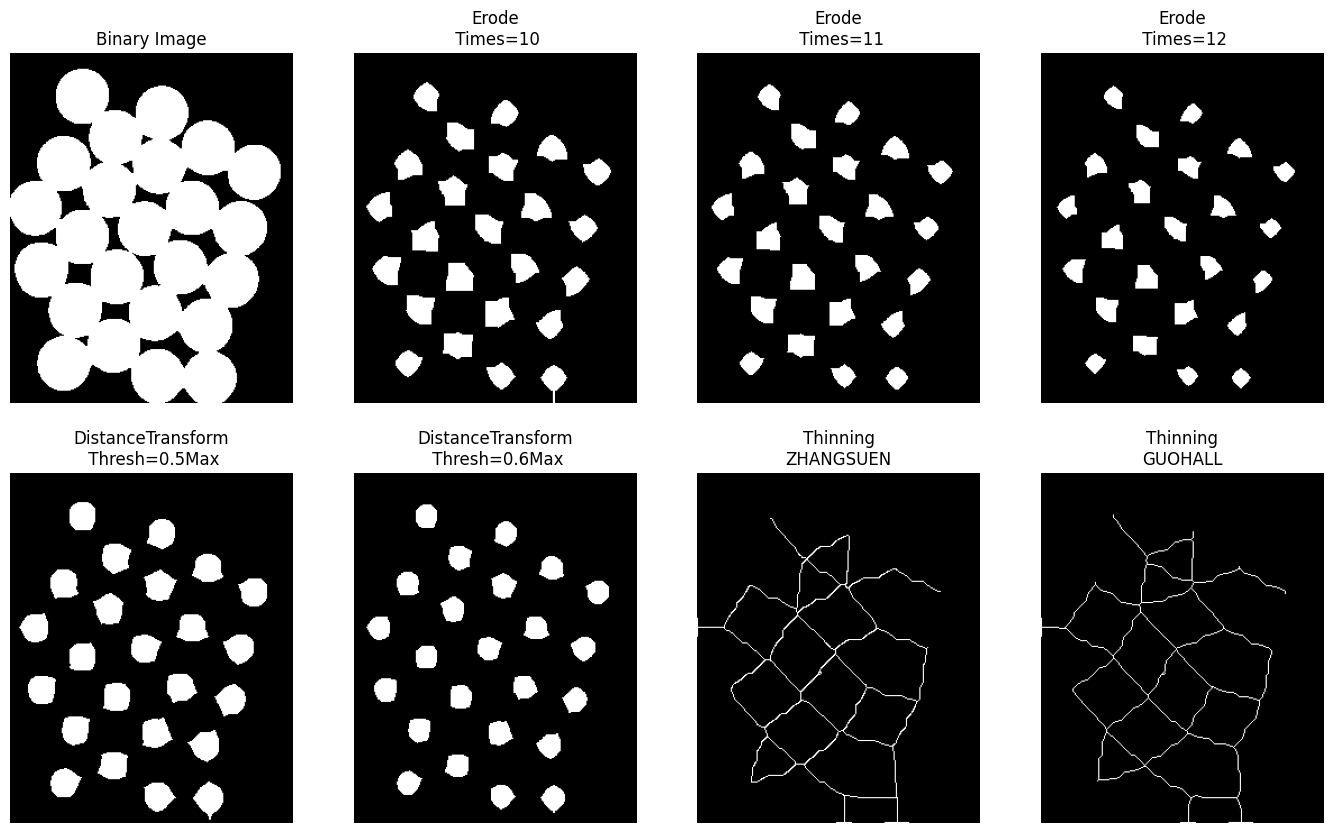

In [8]:
'''
1. 对比膨胀腐蚀 和 distanceTransform 提取确定前景的效果： distanceTransform 更健壮
2. thinning 的结果展示
'''
src = cv2.imread('./image/coins.jpg', -1)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

results = []

# 阈值 + 形态学处理去除噪声
ret, bin_img = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

results.append(['Binary Image', np.copy(bin_img)])

# print('使用腐蚀，迭代10次')
sure_fg = cv2.erode(bin_img, kernel, iterations=10)
results.append(['Erode\n Times=10', np.copy(sure_fg)])

# print('使用腐蚀，迭代11次')
sure_fg = cv2.erode(bin_img, kernel, iterations=11)
results.append(['Erode\n Times=11', np.copy(sure_fg)])

# print('使用腐蚀，迭代12次')
sure_fg = cv2.erode(bin_img, kernel, iterations=12)
results.append(['Erode\n Times=12', np.copy(sure_fg)])

# print('使用 DistanceTransform，阈值 0.5Max')
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
results.append(['DistanceTransform\n Thresh=0.5Max', np.copy(sure_fg)])

# print('使用 DistanceTransform，阈值 0.6Max')
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist, 0.6 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
results.append(['DistanceTransform\n Thresh=0.6Max', np.copy(sure_fg)])

print('DistanceTransform 更普适，因为你不知道另一个场景下 Erode 次数多少才合适，而根据最大值设置阈值更靠谱')

thin1 = cv2.ximgproc.thinning(bin_img, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
results.append(['Thinning\nZHANGSUEN', thin1])

thin2 = cv2.ximgproc.thinning(bin_img, thinningType=cv2.ximgproc.THINNING_GUOHALL)
results.append(['Thinning\nGUOHALL', thin2])

show_images(results, scale=10)
 
# # unknown area
# unknown = cv2.subtract(sure_bg, sure_fg)
# imshow(unknown, axes[1,1])
# axes[1, 1].set_title('Unknown')
 
# plt.show()